# Micro Credit Defaulter Project

***

In [1]:
#Feature Description

In [3]:
description = pd.read_excel('Data_Description.xlsx',sheet_name = 'Description')

description.shape

(36, 3)

In [4]:
df_table = pd.DataFrame(description , columns = ['Variable', 'Definition'])

In [5]:
df_table = df_table.set_index(['Variable', 'Definition'])

In [6]:
col = ['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate']
df_table.loc[col]

,
Variable,Definition
label,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}"
msisdn,mobile number of user
aon,age on cellular network in days
daily_decr30,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"
daily_decr90,"Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)"
rental30,Average main account balance over last 30 days
rental90,Average main account balance over last 90 days
last_rech_date_ma,Number of days till last recharge of main account
last_rech_date_da,Number of days till last recharge of data account


***

Target---
Build a model which can be used to predict in terms of a probability for each loan transaction, 
whether the customer will be paying back the loaned amount within 5 days of insurance of loan. 
In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter,
while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

***

In [ ]:
#import libary for use method
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df = pd.read_csv('Micro Credit Data.csv')
df.drop('Unnamed: 0',axis='columns', inplace=True)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [ ]:
#frequency of object features
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

47819I90840    7
04581I85330    7
43096I88688    6
87592I84456    6
71742I90843    6
              ..
38920I90586    1
91722I89230    1
19075I70780    1
48565I70371    1
18593I88680    1
Name: msisdn, Length: 186243, dtype: int64

UPW    209593
Name: pcircle, dtype: int64

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64



In [ ]:
#we can drop some features for further processing
df.drop(['pdate','pcircle','msisdn'],axis='columns', inplace=True)
df

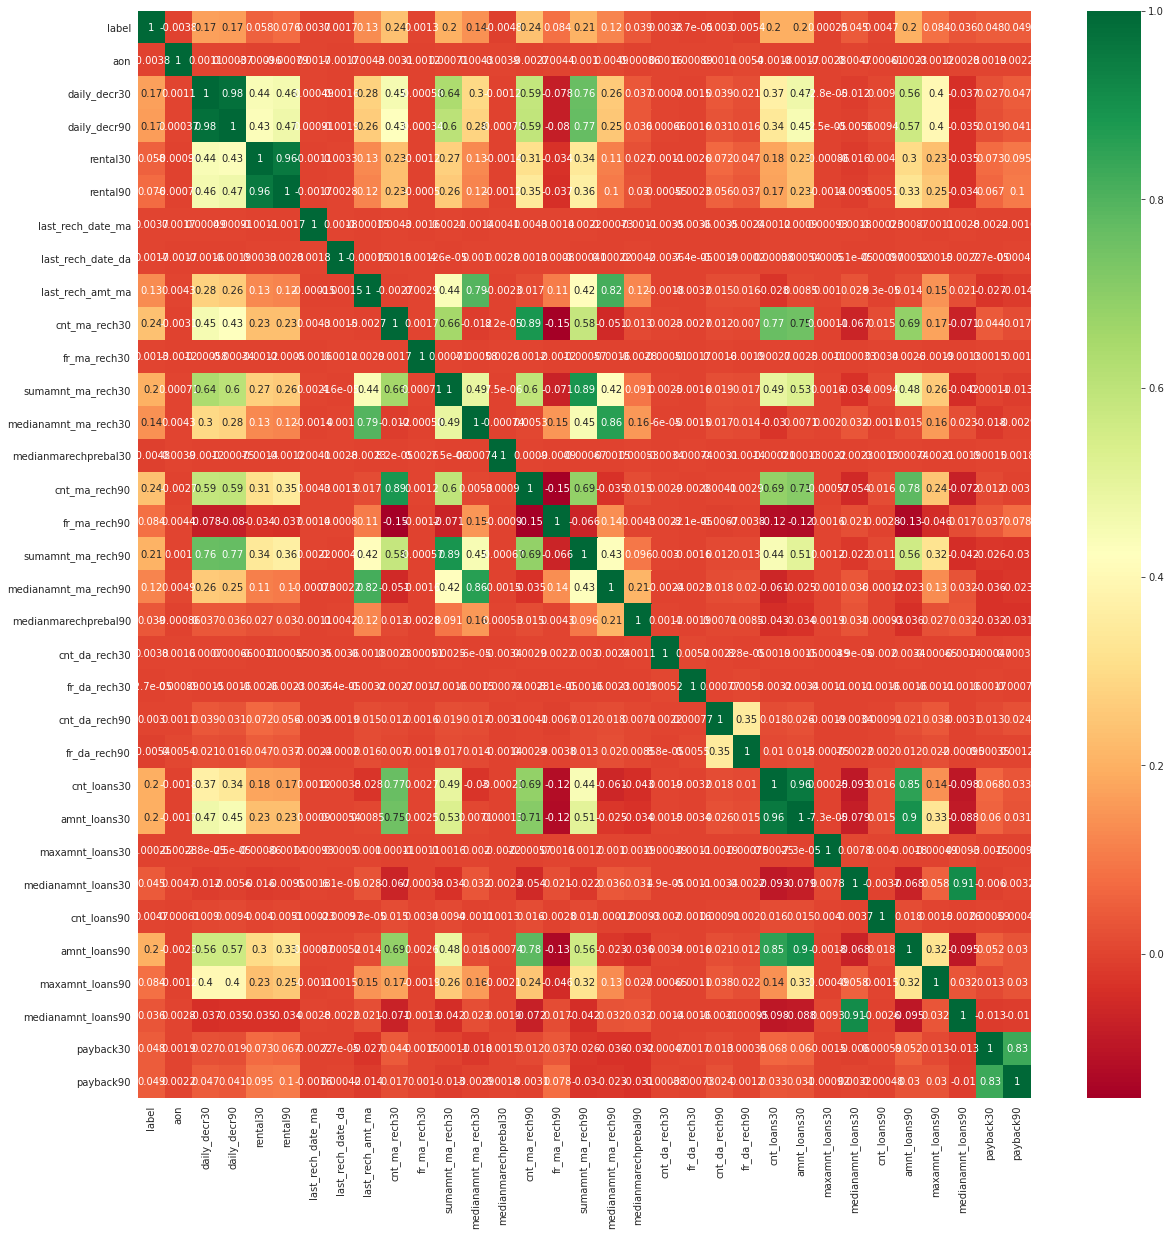

In [ ]:
#get correlations of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#frequency of values in each float64 columns
for col in df.columns:
    if df[col].dtype=="float64":
        print(df[col].value_counts())
        print()

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64

0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3565.333333       1
596.172000        1
700.126667        1
7604.514667       1
4108.476000       1
Name: daily_decr30, Length: 147026, dtype: int64

0.000        4063
500.000       781
1000.000      490
700.000       343
600.000       316
             ... 
784.600         1
84.276          1
12853.830       1
1307.920        1
16839.040       1
Name: daily_decr90, Length: 158670, dtype: int64

0.00        7566
200.13      1379
99.56       1020
400.26       530
199.12       461
            ... 
1103.55        1
6128.63        1
577.44         1
14544.75       1
2780.99        1
Name: rental30, Length: 1

In [ ]:
#frequency of values in each int64 columns
for col in df.columns:
    if df[col].dtype=="int64":
        print(df[col].value_counts())
        print()

1    183431
0     26162
Name: label, dtype: int64

1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
19913        1
10454        1
14783        1
4066         1
22609        1
Name: last_rech_amt_ma, Length: 70, dtype: int64

1      37238
2      31216
0      27979
3      25519
4      20258
       ...  
64         1
63         1
59         1
50         1
115        1
Name: cnt_ma_rech30, Length: 71, dtype: int64

1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
151        1
336        1
121        1
172        1
127        1
Name: cnt_ma_rech90, Length: 110, dtype: int64

0     65753
1     24373
2     19285
3     13192
4     10021
      ...  
80        7
81        7
88        5
84        4
87        1
Name: fr_ma_rech90, Length: 89, dtype: int64

0        20950
1539      5631
773       4177
770       3982
2309      2542
         ...  
43107        1
14406        1
47201        1
20555        1
48296        1
Name: suma

***

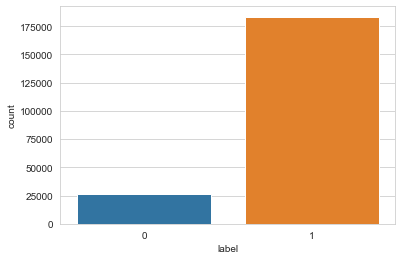

In [10]:
sns.countplot(x="label",data=df)
plt.show()
#the users that didn't paid back the credit amount within 5 days is around 1/8 th of the total people who took loan. 

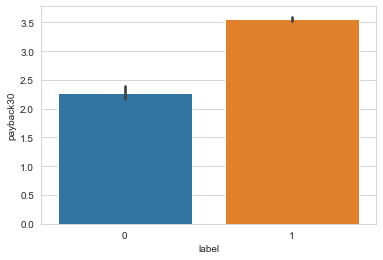

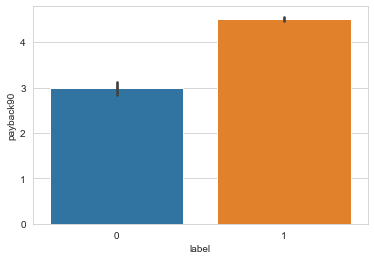

In [24]:
sns.barplot(y="payback30",x="label",data=df)
plt.show()
sns.barplot(y="payback90",x="label",data=df)
plt.show()
# average loan payback time is 3-4 days.

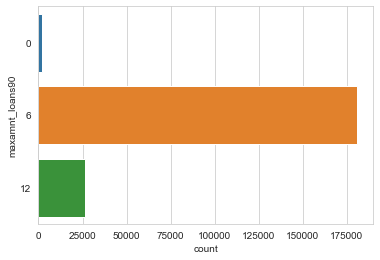

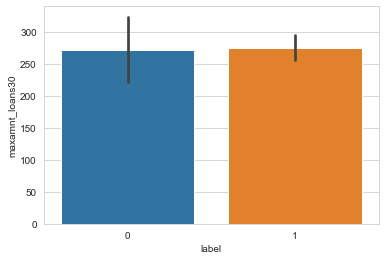

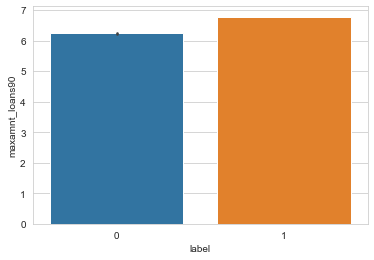

In [26]:
sns.countplot(y="maxamnt_loans90",data=df)
plt.show()
sns.barplot(y="maxamnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="maxamnt_loans90",x="label",data=df)
plt.show()
#maximum amount of loan taken by each user in 90 days is 5 Rs for which they had to pay 6 Rs.
#we also see outliers present in maximum amount loan taken in 30 days. And 50% users took loan in 30 days.

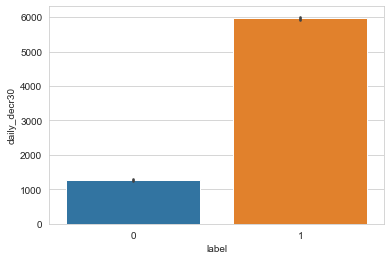

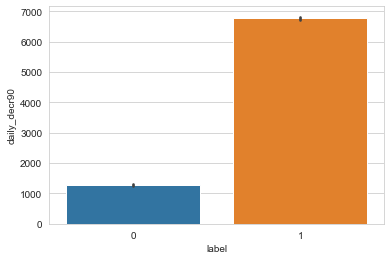

In [32]:
sns.barplot(y="daily_decr30",x="label",data=df)
plt.show()
sns.barplot(y="daily_decr90",x="label",data=df)
plt.show()
#non defaulters spent 6 times higher daily amount from main account within 30 days
#non defaulters spent 7 times higher daily amount from main account within 90 days

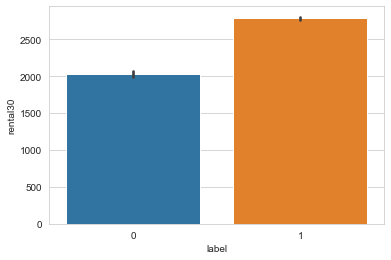

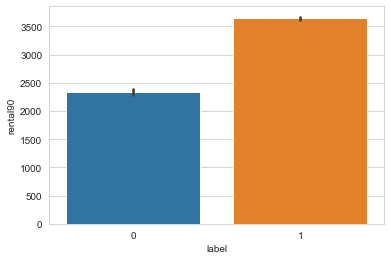

In [14]:
sns.barplot(y="rental30",x="label",data=df)
plt.show()
sns.barplot(y="rental90",x="label",data=df)
plt.show()
#Average main account balance is high for non defaulters

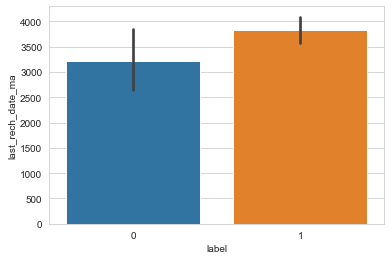

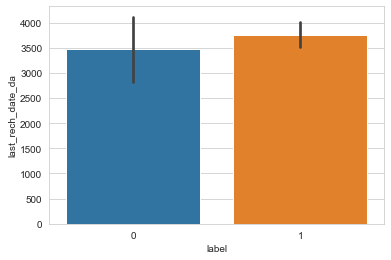

In [17]:
sns.barplot(y="last_rech_date_ma",x="label",data=df)
plt.show()
sns.barplot(y="last_rech_date_da",x="label",data=df)
plt.show()
#Number of days till last recharge of main account & data account is higher for non defaulters.
#outliers are present.

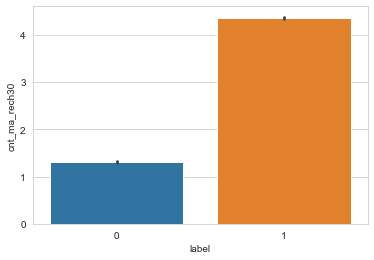

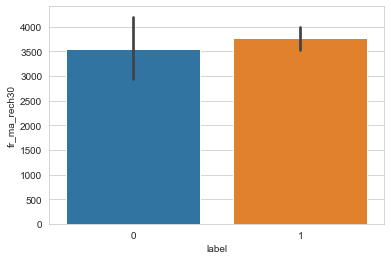

In [18]:
sns.barplot(y="cnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="fr_ma_rech30",x="label",data=df)
plt.show()
#Number of times main account got recharged is higher for non defaulters in last 30 days.
#Frequency of main account recharged in last 30 days is slight higher for non defaulter and significant amount of outliers are present.

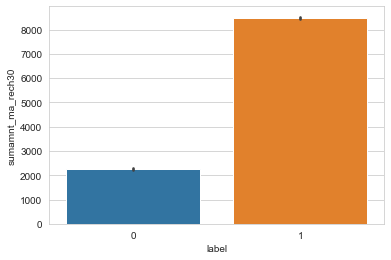

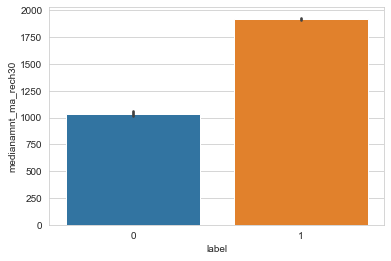

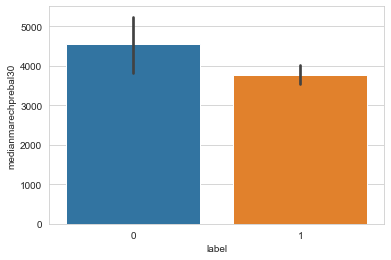

In [19]:
sns.barplot(y="sumamnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="medianamnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="medianmarechprebal30",x="label",data=df)
plt.show()
#Total amount of recharge in main account over last 30 days is higher for non defaulters
#Median of main account balance just before recharge in last 30 is higher for non defaulters.
#we also see outliers present in Median of main account balance just before recharge.

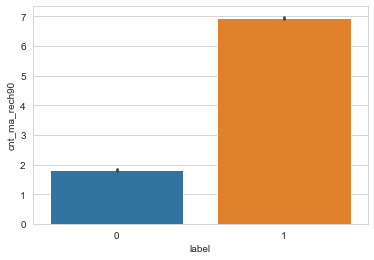

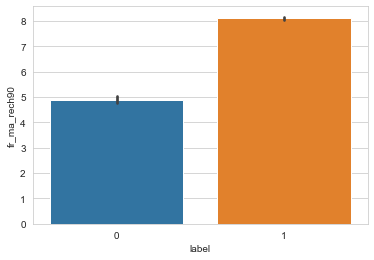

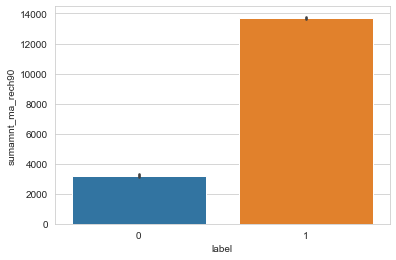

In [20]:
sns.barplot(y="cnt_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="fr_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="sumamnt_ma_rech90",x="label",data=df)
plt.show()
#Number of times main account got recharged is higher for non defaulters in last 90 days.
#Frequency of main account recharged in last 90 days is slight higher for non defaulter.
#Total amount of recharge in main account over last 90 days is higher for non defaulters.

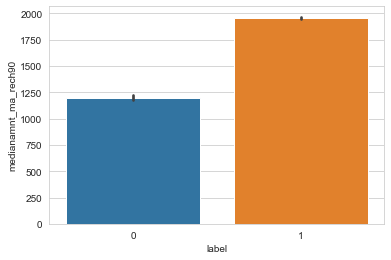

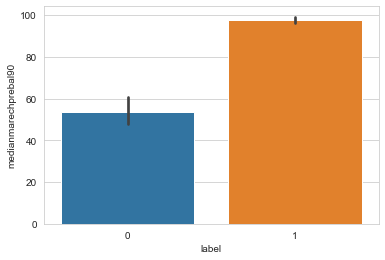

In [21]:
sns.barplot(y="medianamnt_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="medianmarechprebal90",x="label",data=df)
plt.show()
#Median of main account balance just before recharge in last 90 is higher for non defaulters.
#we also see outliers present in Median of main account balance just before recharge.

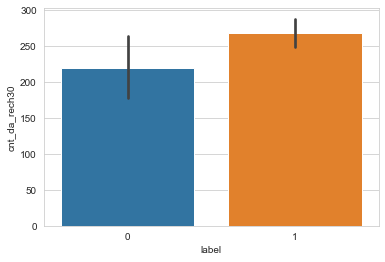

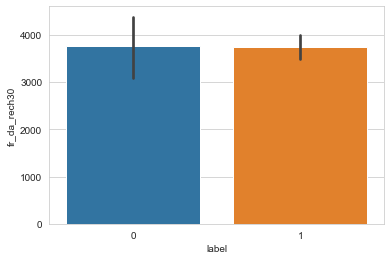

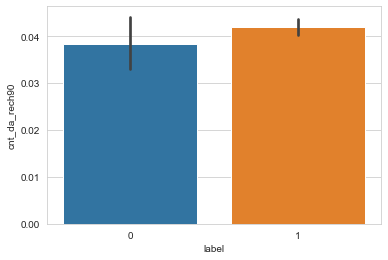

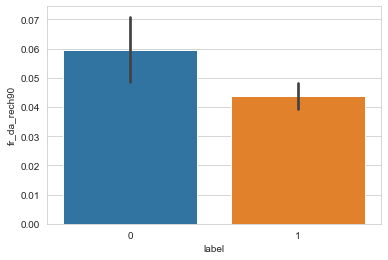

In [22]:
sns.barplot(y="cnt_da_rech30",x="label",data=df)
plt.show()
sns.barplot(y="fr_da_rech30",x="label",data=df)
plt.show()
sns.barplot(y="cnt_da_rech90",x="label",data=df)
plt.show()
sns.barplot(y="fr_da_rech90",x="label",data=df)
plt.show()
#non defaulters recharged the data account more than defaulters in last 30 days.
#Frequency of data account recharged is almost same defaulters and non defaulters in last 30 days
#non defaulters recharged the data account more than defaulters in last 90 days.
#outliers are present

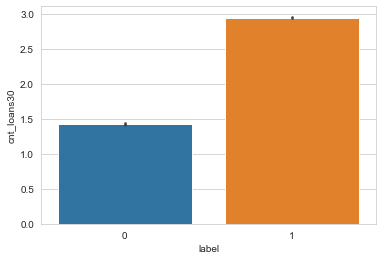

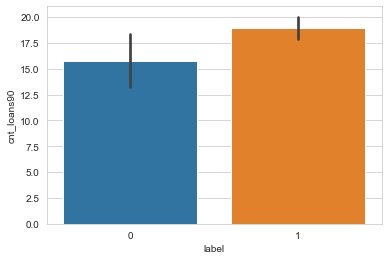

In [23]:
sns.barplot(y="cnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="cnt_loans90",x="label",data=df)
plt.show()
#Number of loans taken by user in last 30 & 90 days is higher for non defaulters.
#outliers are present in Number of loans taken by user in last 90 days

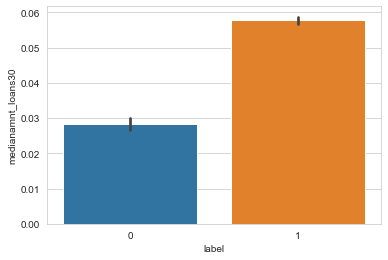

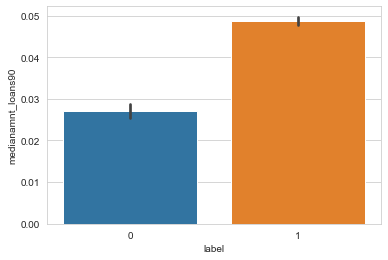

In [34]:
sns.barplot(y="medianamnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="medianamnt_loans90",x="label",data=df)
plt.show()
#Median of amounts of loan taken by the user in last 30 & 90 days is higher for non defaulters with outliers present.

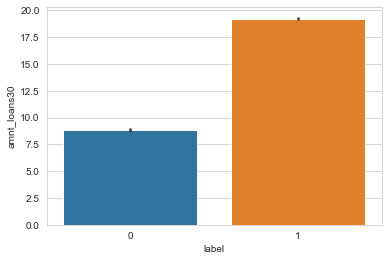

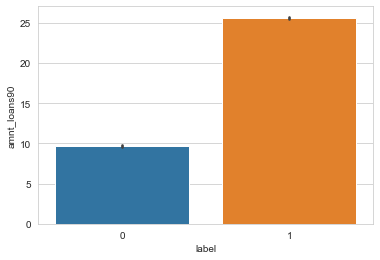

In [33]:
sns.barplot(y="amnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="amnt_loans90",x="label",data=df)
plt.show()
#Total amount of loans taken by user in last 30 & 90 days is higher for non defaulter.

***

In [ ]:
#Feature selection

In [ ]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [ ]:
df1 = df.copy() 
df1_x = df1.drop('label', axis = 1)
y1 = df1['label']
print(df1_x.shape)
print(y1.shape)

(209593, 32)
(209593,)


[0.07566581 0.12442817 0.11555847 0.07686232 0.07277254 0.0498209
 0.00382445 0.02938003 0.02675339 0.01619884 0.03305827 0.02591506
 0.03807851 0.03383804 0.03564076 0.03227427 0.02959596 0.04481018
 0.00284307 0.00199206 0.00326747 0.00101868 0.02017971 0.02032133
 0.00217975 0.00404867 0.00702294 0.02419115 0.00734201 0.00409205
 0.01839798 0.01862712]


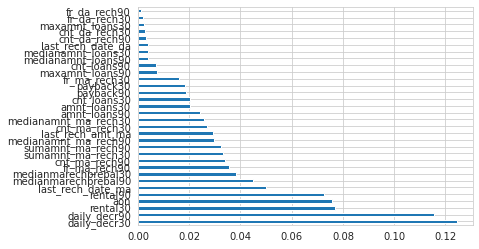

In [ ]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df1_x,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df1_x.columns)
feat_importances.nlargest(32).plot(kind='barh')
plt.show()

In [ ]:
# Outlier points
lis=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']
q3 = df[lis].quantile(0.75)
q1 = df[lis].quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
cnt_loans90                 4.000
amnt_loans90               24.000
payback30                   3.750
payback90          

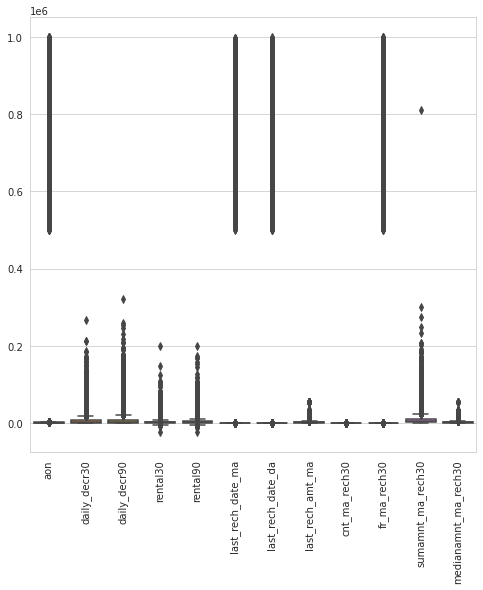

In [ ]:
#Check for outliers in data using boxplot
chart=sns.boxplot(data=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', ]])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(8,8)

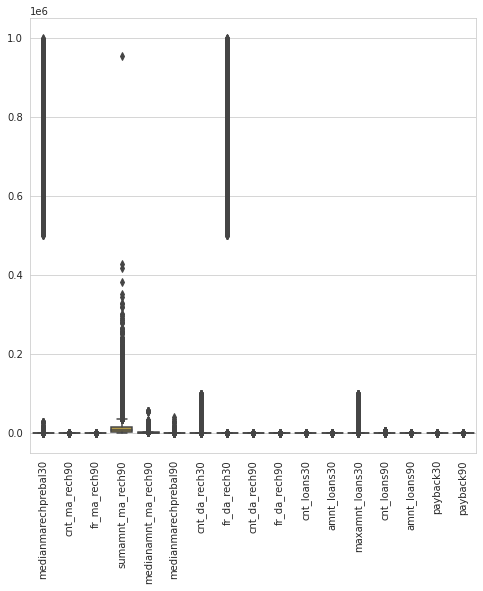

In [ ]:
#Check for outliers in data using boxplot
chart=sns.boxplot(data=df[['medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(8,8)

In [ ]:
#Outlier Analysis
from sklearn.impute import KNNImputer
for i in ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Impute missing values with KNN
df = pd.DataFrame(KNNImputer(n_neighbors=2).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

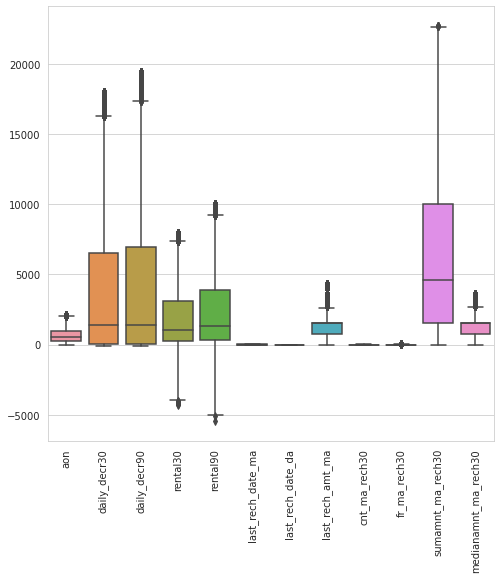

In [ ]:
#Check for outliers in data using boxplot
chart=sns.boxplot(data=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', ]])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(8,8)

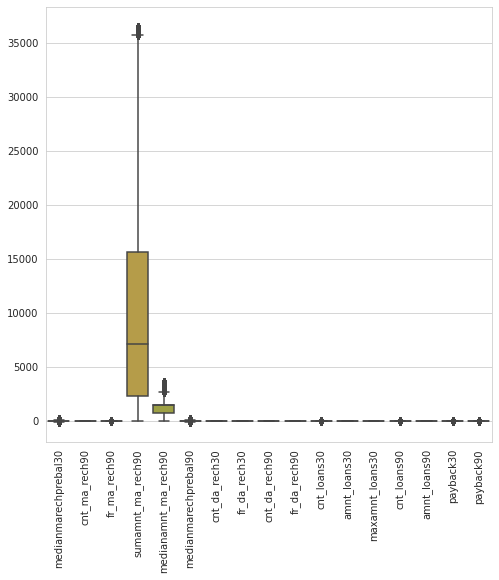

In [ ]:
#Check for outliers in data using boxplot
chart=sns.boxplot(data=df[['medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(8,8)

In [ ]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2.0,3.0,3078.0,1539.0,7.500,2.0,5.5,3078.0,1539.0,7.500,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.633333,0.617647
1,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,2.5,0.0,1539.0,1.0,0.0,5787.0,1543.0,61.040,1.0,0.0,5787.0,1543.0,61.040,0.0,0.0,0.0,0.0,1.0,12.0,6.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1.0,0.0,1539.0,1539.0,66.320,1.0,0.0,1539.0,1539.0,66.320,0.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,1.0,241.0,21.228000,21.228000,159.42,159.42,7.0,0.0,947.0,0.0,0.0,0.0,0.0,0.000,1.0,0.0,947.0,947.0,2.500,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7.0,2.0,20029.0,2309.0,29.000,8.0,2.0,23496.0,2888.0,35.000,0.0,0.0,0.0,0.0,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,3.0,2.0,10404.0,3178.0,91.810,3.0,2.0,10404.0,3178.0,91.810,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,4.0,1.0,3092.0,773.0,161.300,6.0,2.0,4038.0,773.0,111.800,0.0,0.0,0.0,0.0,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,5.0,8.0,9334.0,1539.0,51.130,11.0,5.0,18592.0,1539.0,47.130,0.0,0.0,0.0,0.0,4.0,42.0,6.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,0.0,773.0,5.0,4.0,12154.0,773.0,164.000,6.0,4.0,17941.0,2410.5,100.000,0.0,0.0,0.0,0.0,2.0,18.0,6.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  float64
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  float64
 9   cnt_ma_rech30         209593 non-null  float64
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  float64
 15  

In [ ]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.0,209593.0,209593.0,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,645.009507,3794.447387,4103.157641,1914.048112,2372.953551,4.037881,0.0,1459.444378,3.513450,3.116812,6400.839043,1263.409952,43.430013,5.417139,3.719258,10159.572004,1291.780721,43.363151,0.0,0.0,0.0,0.0,2.472649,15.667952,6.0,0.054029,3.121760,19.599901,6.703134,0.046077,1.642538,2.057433
std,0.330519,480.706513,4782.267465,5270.893888,2079.160917,2607.710953,3.716780,0.0,988.925787,2.912207,3.794168,5776.842082,779.950877,42.448231,4.602816,4.427489,9472.286447,737.135098,38.832171,0.0,0.0,0.0,0.0,1.790312,11.146509,0.0,0.218039,2.510682,15.451156,2.103864,0.200692,2.243650,2.610535
min,0.000000,-48.000000,-93.012667,-93.012667,-4310.350000,-5479.440000,-8.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,-82.030000,0.0,0.0,0.0,0.0,0.000000,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,245.000000,42.420000,42.666667,277.600000,299.960000,1.000000,0.0,770.000000,1.000000,0.000000,1540.000000,770.000000,11.175000,2.000000,0.000000,2317.000000,773.000000,14.720000,0.0,0.0,0.0,0.0,1.000000,6.000000,6.0,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,520.000000,1401.000000,1428.000000,1069.440000,1313.740000,3.000000,0.0,1539.000000,3.000000,2.000000,4626.000000,1539.000000,29.900000,4.000000,2.000000,7146.000000,1539.000000,32.000000,0.0,0.0,0.0,0.0,2.000000,12.000000,6.0,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.250000
75%,1.000000,951.000000,6543.000000,6984.440000,3128.880000,3888.000000,7.000000,0.0,1547.000000,5.000000,5.000000,10000.000000,1543.000000,65.000000,8.000000,6.000000,15697.000000,1547.000000,63.330000,0.0,0.0,0.0,0.0,3.000000,24.000000,6.0,0.000000,4.000000,30.000000,6.000000,0.000000,3.000000,3.400000
max,1.000000,2086.000000,18046.194000,19442.910000,7970.920000,10053.850000,16.000000,0.0,4340.000000,11.000000,15.000000,22715.000000,3630.000000,191.000000,17.000000,20.000000,36520.000000,3630.000000,176.350000,0.0,0.0,0.0,0.0,8.000000,48.000000,6.0,3.000000,11.000000,66.000000,12.000000,3.000000,9.375000,11.250000


In [ ]:
#we can drop less important featues for further process
df.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30' ],axis='columns', inplace=True)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539.0,2.0,3.0,3078.0,1539.0,7.500,2.0,5.5,3078.0,1539.0,7.500,2.0,12.0,0.0,2.0,12.0,6.0,0.0,0.633333,0.617647
1,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,2.5,1539.0,1.0,0.0,5787.0,1543.0,61.040,1.0,0.0,5787.0,1543.0,61.040,1.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539.0,1.0,0.0,1539.0,1539.0,66.320,1.0,0.0,1539.0,1539.0,66.320,1.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,1.0,241.0,21.228000,21.228000,159.42,159.42,7.0,947.0,0.0,0.0,0.0,0.0,0.000,1.0,0.0,947.0,947.0,2.500,2.0,12.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309.0,7.0,2.0,20029.0,2309.0,29.000,8.0,2.0,23496.0,2888.0,35.000,7.0,42.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048.0,3.0,2.0,10404.0,3178.0,91.810,3.0,2.0,10404.0,3178.0,91.810,2.0,12.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773.0,4.0,1.0,3092.0,773.0,161.300,6.0,2.0,4038.0,773.0,111.800,3.0,18.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539.0,5.0,8.0,9334.0,1539.0,51.130,11.0,5.0,18592.0,1539.0,47.130,4.0,42.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773.0,5.0,4.0,12154.0,773.0,164.000,6.0,4.0,17941.0,2410.5,100.000,2.0,18.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


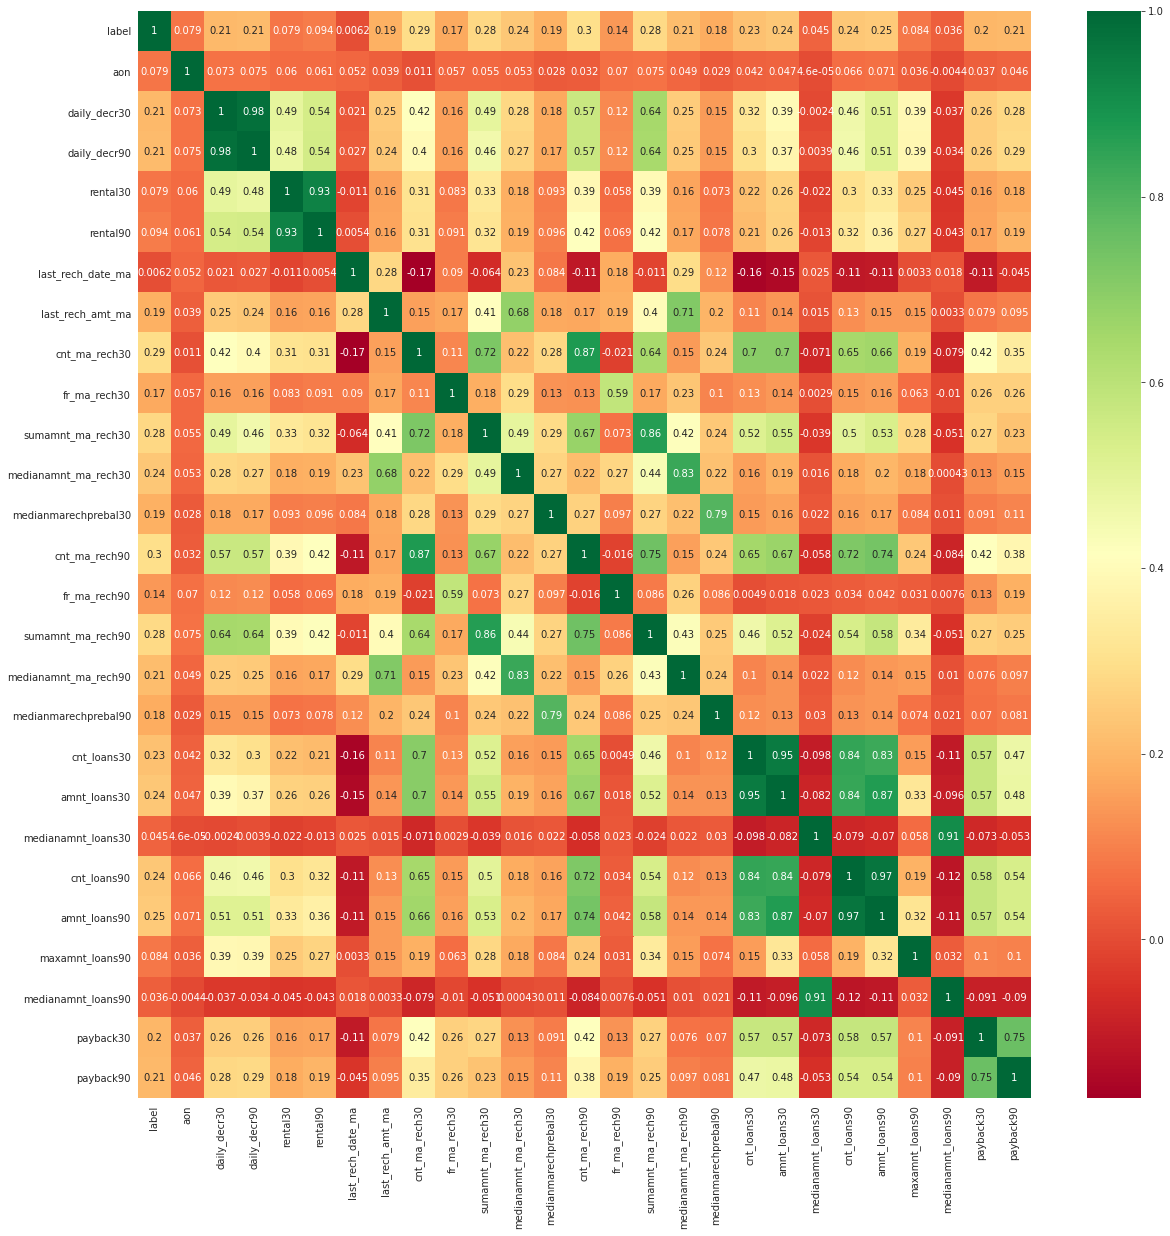

In [ ]:
#get correlations of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#we can save final processed dataset for modeling
#df.to_csv('file1.csv') 

***

In [ ]:
#import libary for use method
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# sns.set_style('whitegrid')
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving file1.csv to file1.csv


In [ ]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['file1.csv']))
# df.drop('Unnamed: 0',axis='columns', inplace=True)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539.0,2.0,3.0,3078.0,1539.0,7.500,2.0,5.5,3078.0,1539.0,7.500,2.0,12.0,0.0,2.0,12.0,6.0,0.0,0.633333,0.617647
1,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,2.5,1539.0,1.0,0.0,5787.0,1543.0,61.040,1.0,0.0,5787.0,1543.0,61.040,1.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539.0,1.0,0.0,1539.0,1539.0,66.320,1.0,0.0,1539.0,1539.0,66.320,1.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,1.0,241.0,21.228000,21.228000,159.42,159.42,7.0,947.0,0.0,0.0,0.0,0.0,0.000,1.0,0.0,947.0,947.0,2.500,2.0,12.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309.0,7.0,2.0,20029.0,2309.0,29.000,8.0,2.0,23496.0,2888.0,35.000,7.0,42.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048.0,3.0,2.0,10404.0,3178.0,91.810,3.0,2.0,10404.0,3178.0,91.810,2.0,12.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773.0,4.0,1.0,3092.0,773.0,161.300,6.0,2.0,4038.0,773.0,111.800,3.0,18.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539.0,5.0,8.0,9334.0,1539.0,51.130,11.0,5.0,18592.0,1539.0,47.130,4.0,42.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773.0,5.0,4.0,12154.0,773.0,164.000,6.0,4.0,17941.0,2410.5,100.000,2.0,18.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  float64
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  float64
 8   cnt_ma_rech30         209593 non-null  float64
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  float64
 14  fr_ma_rech90          209593 non-null  float64
 15  

In [ ]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,645.009507,3794.447387,4103.157641,1914.048112,2372.953551,4.037881,1459.444378,3.513450,3.116812,6400.839043,1263.409952,43.430013,5.417139,3.719258,10159.572004,1291.780721,43.363151,2.472649,15.667952,0.054029,3.121760,19.599901,6.703134,0.046077,1.642538,2.057433
std,0.330519,480.706513,4782.267465,5270.893888,2079.160917,2607.710953,3.716780,988.925787,2.912207,3.794168,5776.842082,779.950877,42.448231,4.602816,4.427489,9472.286447,737.135098,38.832171,1.790312,11.146509,0.218039,2.510682,15.451156,2.103864,0.200692,2.243650,2.610535
min,0.000000,-48.000000,-93.012667,-93.012667,-4310.350000,-5479.440000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,-82.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,245.000000,42.420000,42.666667,277.600000,299.960000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.175000,2.000000,0.000000,2317.000000,773.000000,14.720000,1.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,520.000000,1401.000000,1428.000000,1069.440000,1313.740000,3.000000,1539.000000,3.000000,2.000000,4626.000000,1539.000000,29.900000,4.000000,2.000000,7146.000000,1539.000000,32.000000,2.000000,12.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.250000
75%,1.000000,951.000000,6543.000000,6984.440000,3128.880000,3888.000000,7.000000,1547.000000,5.000000,5.000000,10000.000000,1543.000000,65.000000,8.000000,6.000000,15697.000000,1547.000000,63.330000,3.000000,24.000000,0.000000,4.000000,30.000000,6.000000,0.000000,3.000000,3.400000
max,1.000000,2086.000000,18046.194000,19442.910000,7970.920000,10053.850000,16.000000,4340.000000,11.000000,15.000000,22715.000000,3630.000000,191.000000,17.000000,20.000000,36520.000000,3630.000000,176.350000,8.000000,48.000000,3.000000,11.000000,66.000000,12.000000,3.000000,9.375000,11.250000


In [ ]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

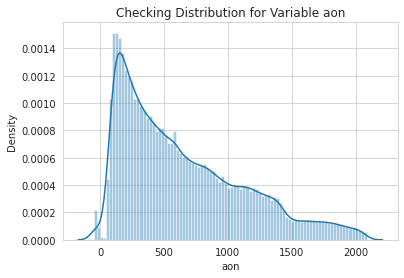

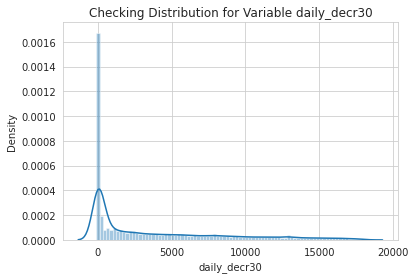

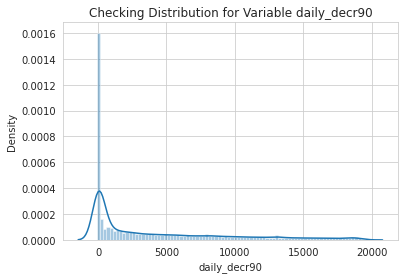

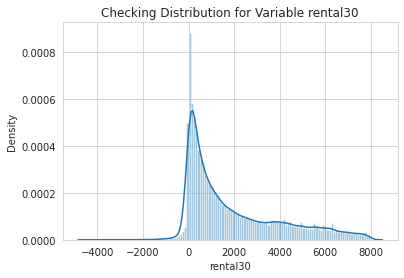

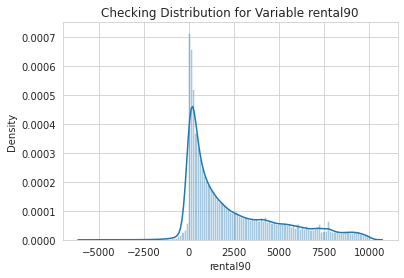

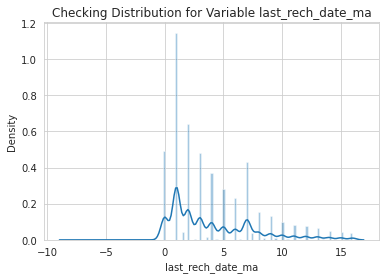

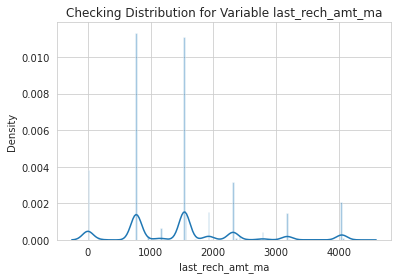

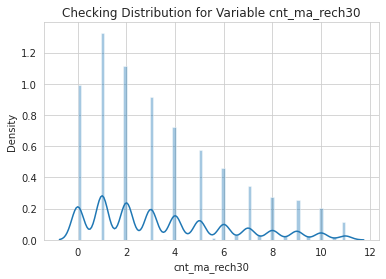

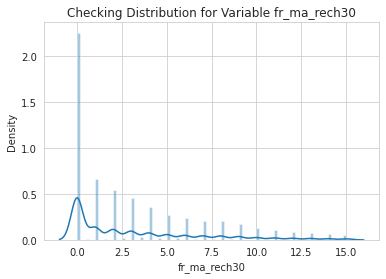

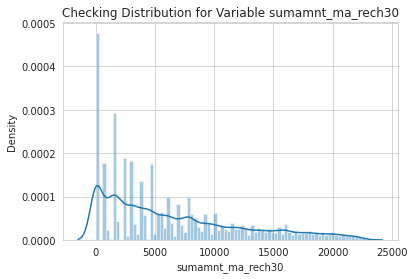

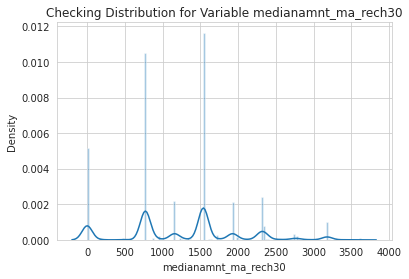

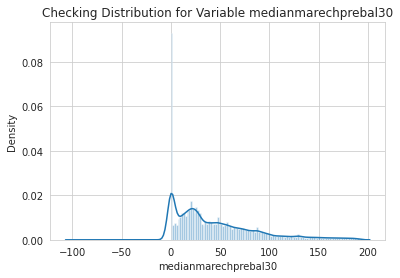

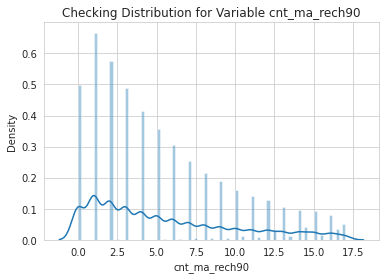

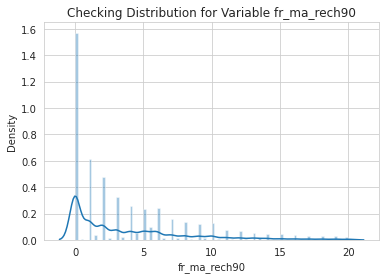

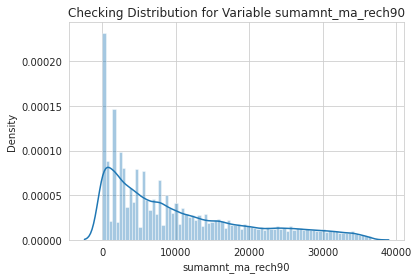

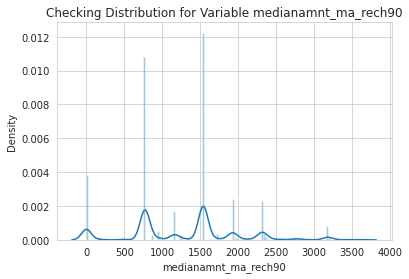

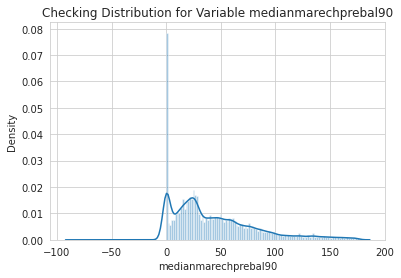

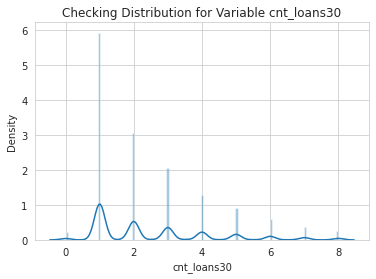

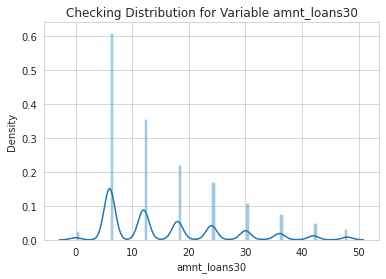

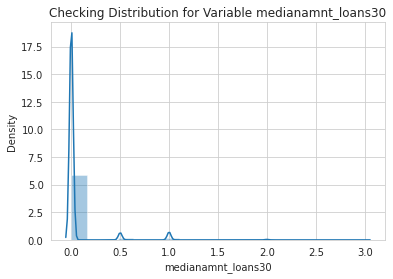

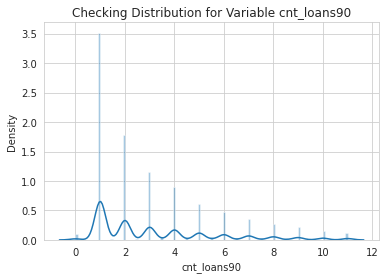

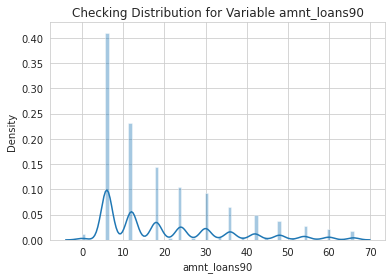

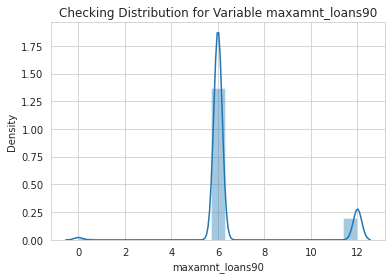

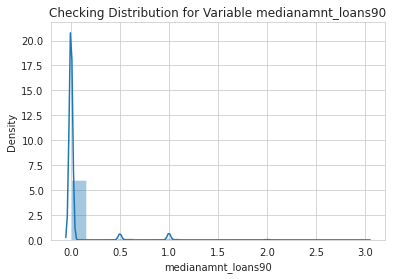

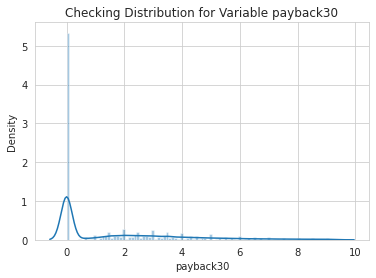

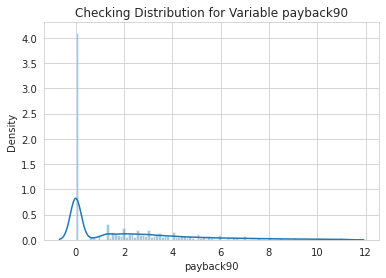

In [ ]:
#Normality check
for i in ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']:
   
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [ ]:
#Normalization of continuous variables
for i in ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']:
    
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

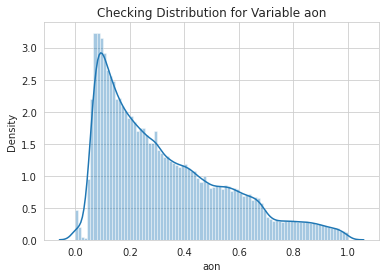

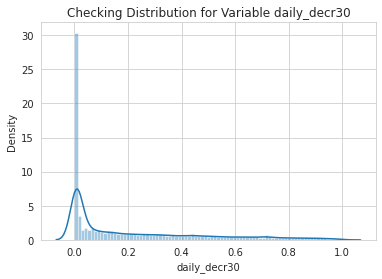

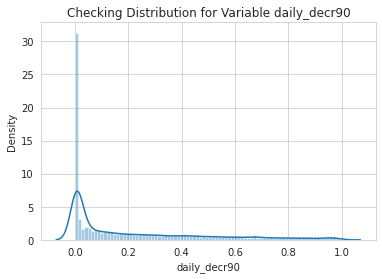

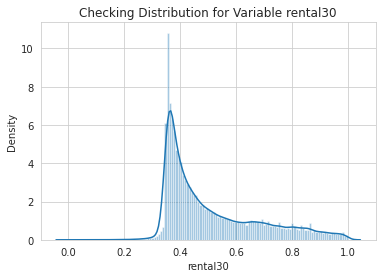

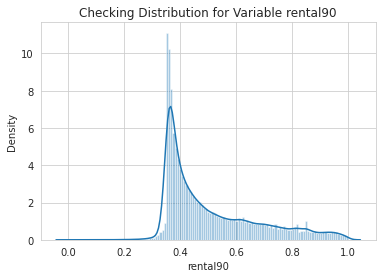

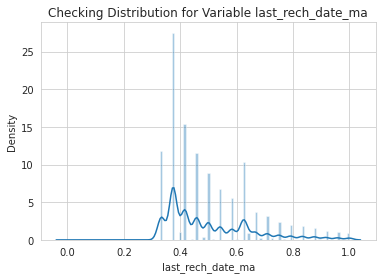

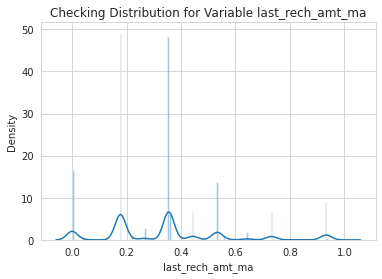

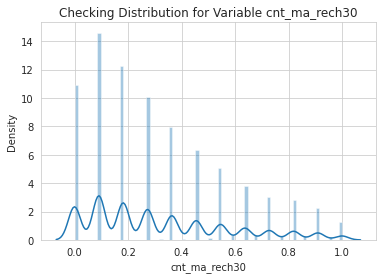

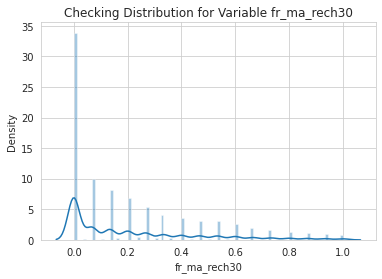

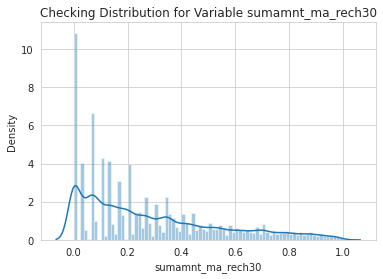

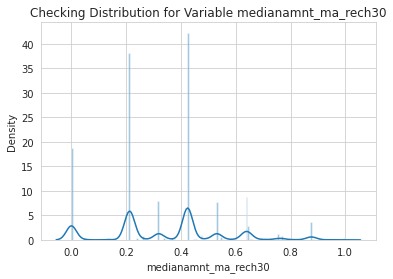

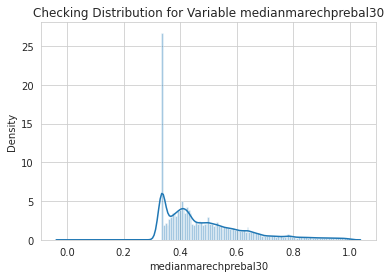

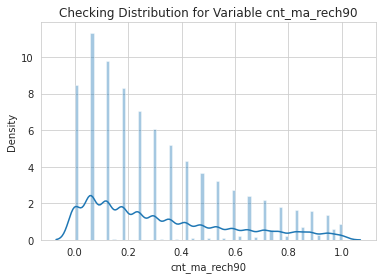

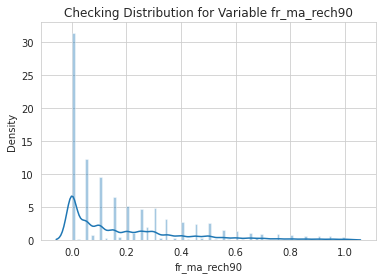

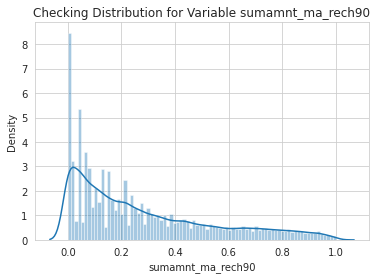

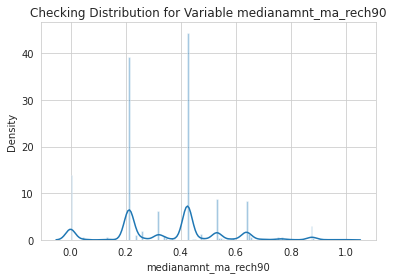

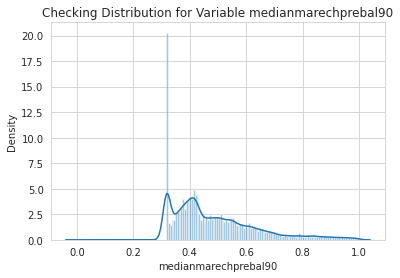

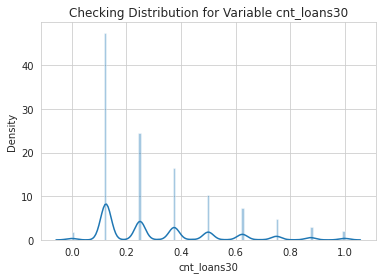

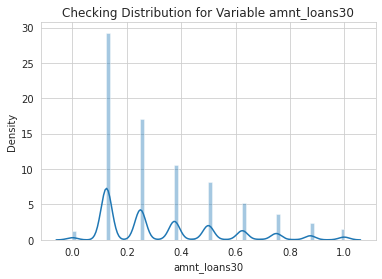

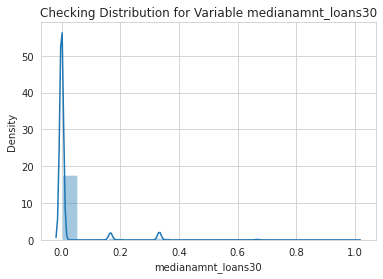

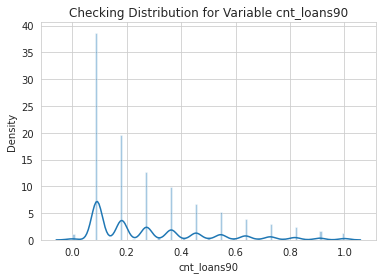

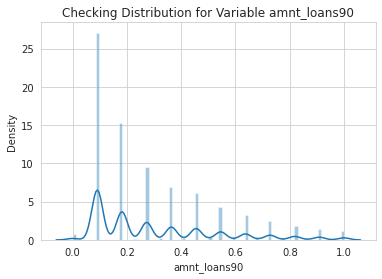

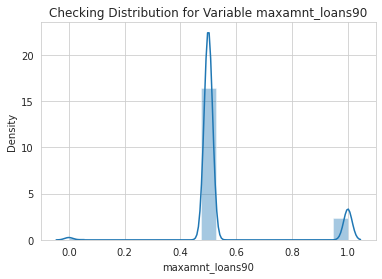

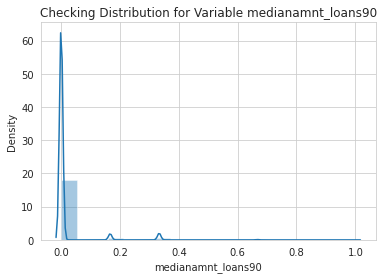

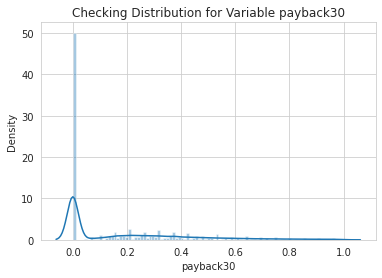

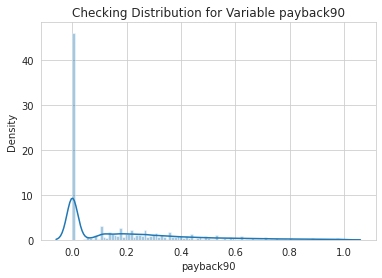

In [ ]:
#Normality check
for i in ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']:
    
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.0,1.000000,1.000000,1.000000,1.0
aon,209593.0,0.324747,0.225261,0.0,0.137301,0.266167,0.468135,1.0
daily_decr30,209593.0,0.214313,0.263643,0.0,0.007466,0.082364,0.365838,1.0
daily_decr90,209593.0,0.214793,0.269805,0.0,0.006945,0.077857,0.362279,1.0
rental30,209593.0,0.506820,0.169295,0.0,0.373573,0.438048,0.605738,1.0
rental90,209593.0,0.505520,0.167879,0.0,0.372065,0.437330,0.603056,1.0
last_rech_date_ma,209593.0,0.501578,0.154866,0.0,0.375000,0.458333,0.625000,1.0
last_rech_amt_ma,209593.0,0.336278,0.227863,0.0,0.177419,0.354608,0.356452,1.0
cnt_ma_rech30,209593.0,0.319405,0.264746,0.0,0.090909,0.272727,0.454545,1.0
fr_ma_rech30,209593.0,0.207787,0.252945,0.0,0.000000,0.133333,0.333333,1.0


In [ ]:
#Lets divide the dataset into input and output
df_x=df.drop(columns=["label"])
y=df[["label"]]

In [ ]:
df_x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aon,209593.0,0.324747,0.225261,0.0,0.137301,0.266167,0.468135,1.0
daily_decr30,209593.0,0.214313,0.263643,0.0,0.007466,0.082364,0.365838,1.0
daily_decr90,209593.0,0.214793,0.269805,0.0,0.006945,0.077857,0.362279,1.0
rental30,209593.0,0.506820,0.169295,0.0,0.373573,0.438048,0.605738,1.0
rental90,209593.0,0.505520,0.167879,0.0,0.372065,0.437330,0.603056,1.0
last_rech_date_ma,209593.0,0.501578,0.154866,0.0,0.375000,0.458333,0.625000,1.0
last_rech_amt_ma,209593.0,0.336278,0.227863,0.0,0.177419,0.354608,0.356452,1.0
cnt_ma_rech30,209593.0,0.319405,0.264746,0.0,0.090909,0.272727,0.454545,1.0
fr_ma_rech30,209593.0,0.207787,0.252945,0.0,0.000000,0.133333,0.333333,1.0
sumamnt_ma_rech30,209593.0,0.281789,0.254318,0.0,0.067797,0.203654,0.440238,1.0


In [ ]:
y

,label
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209588,1.0
209589,1.0
209590,1.0
209591,1.0


In [ ]:
#preprocessing standardisation of dataset.
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df_x=scaler.fit_transform(df_x)
X=scaled_df_x

In [ ]:
X

array([[-0.77596285, -0.15461267, -0.19693246, ..., -0.22959366,
        -0.44980609, -0.55153044],
       [ 0.13935874,  1.74134394,  1.52186928, ..., -0.22959366,
        -0.73208493, -0.78812884],
       [-0.22885017, -0.50111231, -0.51322682, ..., -0.22959366,
        -0.73208493, -0.78812884],
       ...,
       [ 0.76552192,  1.68302663,  1.48005464, ..., -0.22959366,
         1.05072883,  0.68028348],
       [ 2.26124061,  1.8179246 ,  1.6071719 , ..., -0.22959366,
        -0.73208493,  3.23404404],
       [ 1.94711888,  0.14531104,  0.08189567, ..., -0.22959366,
        -0.73208493, -0.78812884]])

In [ ]:
y

,label
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209588,1.0
209589,1.0
209590,1.0
209591,1.0


In [ ]:
#split train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#check shape of train dataset
X_train.shape

(146715, 26)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [ ]:
# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [ ]:
# Logistic Regression - Random Search for Hyperparameters
import time
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 20.03 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.879 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2.8115440646391914e-11, 'class_weight': None, 'C': 7.177704892186985e+19}

Model with rank: 2
Mean validation score: 0.734 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 7.81248648268161e-13, 'class_weight': 'balanced', 'C': 2959696130582.548}

Model with rank: 3
Mean validation score: 0.731 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 5.063728905905737e-16, 'class_weight': 'balanced', 'C': 0.00025920380000773373}

Model with rank: 4
Mean validation score: 0.699 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.4458259377089016e-19, 'class_weight': 'balanced', 'C': 6.68778847047251e-08}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 6.375003800958766e-16, 'class_weight': 'balanced', 'C': 1

In [ ]:

# Logistic Regression
import datetime
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1),X_train,y_train,X_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 87.72
Accuracy CV 10-Fold: 87.89
Running Time: 0:00:20.492116


In [ ]:
print (metrics.classification_report(y_train, train_pred_log) )

              precision    recall  f1-score   support

         0.0       0.61      0.07      0.13     18260
         1.0       0.88      0.99      0.93    128455

    accuracy                           0.88    146715
   macro avg       0.75      0.53      0.53    146715
weighted avg       0.85      0.88      0.83    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_log) )

              precision    recall  f1-score   support

         0.0       0.60      0.07      0.12      7902
         1.0       0.88      0.99      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.74      0.53      0.53     62878
weighted avg       0.85      0.88      0.83     62878



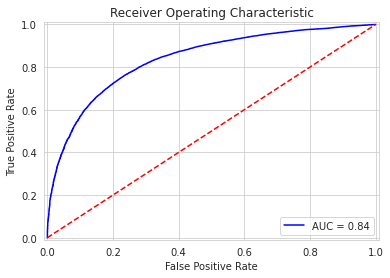

In [ ]:
plot_roc_curve(y_test, probs_log)

In [ ]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 87.12
Accuracy CV 10-Fold: 86.83
Running Time: 0:32:55.087251


In [ ]:
print (metrics.classification_report(y_train, train_pred_knn) )

              precision    recall  f1-score   support

         0.0       0.46      0.35      0.40     18260
         1.0       0.91      0.94      0.93    128455

    accuracy                           0.87    146715
   macro avg       0.69      0.64      0.66    146715
weighted avg       0.85      0.87      0.86    146715



In [ ]:

print (metrics.classification_report(y_test, test_pred_knn) )

              precision    recall  f1-score   support

         0.0       0.48      0.35      0.41      7902
         1.0       0.91      0.95      0.93     54976

    accuracy                           0.87     62878
   macro avg       0.70      0.65      0.67     62878
weighted avg       0.86      0.87      0.86     62878



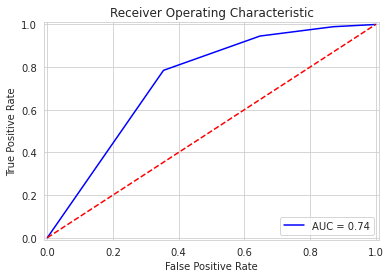

In [ ]:
plot_roc_curve(y_test, probs_knn)

In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 68.94
Accuracy CV 10-Fold: 68.88
Running Time: 0:00:02.190648


In [ ]:
print (metrics.classification_report(y_train, train_pred_gaussian) )

              precision    recall  f1-score   support

         0.0       0.26      0.82      0.40     18260
         1.0       0.96      0.67      0.79    128455

    accuracy                           0.69    146715
   macro avg       0.61      0.75      0.59    146715
weighted avg       0.88      0.69      0.74    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_gaussian) )

              precision    recall  f1-score   support

         0.0       0.26      0.82      0.40      7902
         1.0       0.96      0.67      0.79     54976

    accuracy                           0.69     62878
   macro avg       0.61      0.74      0.59     62878
weighted avg       0.87      0.69      0.74     62878



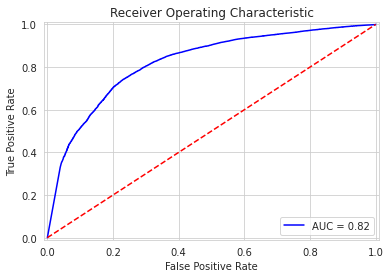

In [ ]:
plot_roc_curve(y_test, probs_gau)

In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, probs_svc = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 87.5
Accuracy CV 10-Fold: 87.64
Running Time: 0:05:10.191326


In [ ]:

print (metrics.classification_report(y_train, train_pred_svc) )

              precision    recall  f1-score   support

         0.0       0.70      0.01      0.02     18260
         1.0       0.88      1.00      0.93    128455

    accuracy                           0.88    146715
   macro avg       0.79      0.51      0.48    146715
weighted avg       0.86      0.88      0.82    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_svc) )

              precision    recall  f1-score   support

         0.0       0.66      0.01      0.02      7902
         1.0       0.88      1.00      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.77      0.51      0.48     62878
weighted avg       0.85      0.88      0.82     62878



In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, probs_sgd = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 87.43
Accuracy CV 10-Fold: 87.55
Running Time: 0:00:06.221039


In [ ]:
print (metrics.classification_report(y_train, train_pred_sgd) )

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     18260
         1.0       0.88      1.00      0.93    128455

    accuracy                           0.88    146715
   macro avg       0.44      0.50      0.47    146715
weighted avg       0.77      0.88      0.82    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_sgd) )

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7902
         1.0       0.87      1.00      0.93     54976

    accuracy                           0.87     62878
   macro avg       0.44      0.50      0.47     62878
weighted avg       0.76      0.87      0.82     62878



In [ ]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 86.2
Accuracy CV 10-Fold: 86.34
Running Time: 0:00:30.899525


In [ ]:
print (metrics.classification_report(y_train, train_pred_dt) )

              precision    recall  f1-score   support

         0.0       0.45      0.49      0.47     18260
         1.0       0.93      0.92      0.92    128455

    accuracy                           0.86    146715
   macro avg       0.69      0.70      0.70    146715
weighted avg       0.87      0.86      0.87    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_dt) )

              precision    recall  f1-score   support

         0.0       0.45      0.49      0.47      7902
         1.0       0.93      0.91      0.92     54976

    accuracy                           0.86     62878
   macro avg       0.69      0.70      0.70     62878
weighted avg       0.87      0.86      0.86     62878



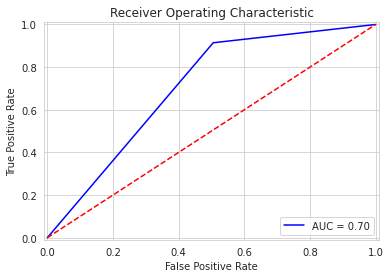

In [ ]:
plot_roc_curve(y_test, probs_dt)

In [ ]:
# Random Forest Classifier - Random Search for Hyperparameters
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 211.18 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.912 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 18}

Model with rank: 2
Mean validation score: 0.911 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 13}

Model with rank: 3
Mean validation score: 0.911 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 8}

Model with rank: 4
Mean validation score: 0.911 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 17}

Model with rank: 5
Mean validation score: 0.911 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'ma

In [ ]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=4,
                             min_samples_split=18, 
                             criterion='entropy', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 91.18
Accuracy CV 10-Fold: 91.16
Running Time: 0:01:07.114951


In [ ]:
print (metrics.classification_report(y_train, train_pred_rf) )

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55     18260
         1.0       0.92      0.98      0.95    128455

    accuracy                           0.91    146715
   macro avg       0.84      0.71      0.75    146715
weighted avg       0.90      0.91      0.90    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_rf) )

              precision    recall  f1-score   support

         0.0       0.76      0.44      0.55      7902
         1.0       0.92      0.98      0.95     54976

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878



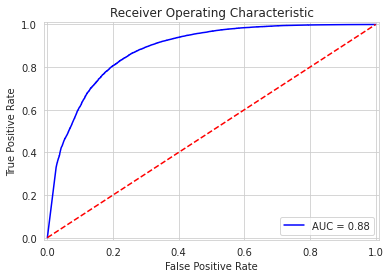

In [ ]:
plot_roc_curve(y_test, probs_rf)

In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 90.88
Accuracy CV 10-Fold: 90.87
Running Time: 0:10:00.507756


In [ ]:
print (metrics.classification_report(y_train, train_pred_gbt) )

              precision    recall  f1-score   support

         0.0       0.81      0.35      0.49     18260
         1.0       0.91      0.99      0.95    128455

    accuracy                           0.91    146715
   macro avg       0.86      0.67      0.72    146715
weighted avg       0.90      0.91      0.89    146715



In [ ]:
print (metrics.classification_report(y_test, test_pred_gbt) )

              precision    recall  f1-score   support

         0.0       0.82      0.35      0.49      7902
         1.0       0.91      0.99      0.95     54976

    accuracy                           0.91     62878
   macro avg       0.86      0.67      0.72     62878
weighted avg       0.90      0.91      0.89     62878



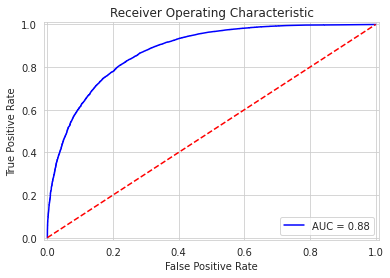

In [ ]:
plot_roc_curve(y_test, probs_gbt)

In [ ]:
#Let's rank the results for all the algorithms we have used.
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,91.18
7,Gradient Boosting Trees,90.88
1,Logistic Regression,87.72
5,Linear SVC,87.50
4,Stochastic Gradient Decent,87.43
0,KNN,87.12
6,Decision Tree,86.20
3,Naive Bayes,68.94


In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,91.16
7,Gradient Boosting Trees,90.87
1,Logistic Regression,87.89
5,Linear SVC,87.64
4,Stochastic Gradient Decent,87.55
0,KNN,86.83
6,Decision Tree,86.34
3,Naive Bayes,68.88


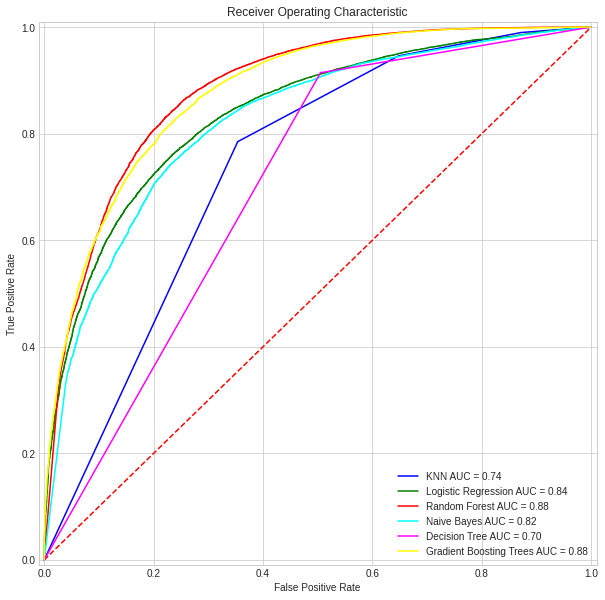

In [ ]:
#Lets see the graphical representation of comparison between the 8 classification algos applied above.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()


In [ ]:
#After applying all the above classification algos on the dataset we see that Gradient Boosting trees & Random Forest both fits the best for our objective.

In [ ]:
# we will use Random Forest as our final model
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=4,
                             min_samples_split=18, 
                             criterion='entropy', 
                             max_features=8)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[ 4815  3087]
 [ 4011 50965]]
f1 score is :  0.9348974575338445
classification report 
               precision    recall  f1-score   support

         0.0       0.55      0.61      0.58      7902
         1.0       0.94      0.93      0.93     54976

    accuracy                           0.89     62878
   macro avg       0.74      0.77      0.76     62878
weighted avg       0.89      0.89      0.89     62878

AUC ROC Score:  0.7681901491576527


In [ ]:
#We see Random Forest to perform the best among other models.
#save the best model.
import pickle
filename='Micro_Credit_Defaulter.pkl'
M=open(filename,'wb')
pickle.dump(rfc,M)
M.close()

***